<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-results" data-toc-modified-id="Load-the-results-1">Load the results</a></span><ul class="toc-item"><li><span><a href="#Metrics" data-toc-modified-id="Metrics-1.1">Metrics</a></span></li></ul></li></ul></div>

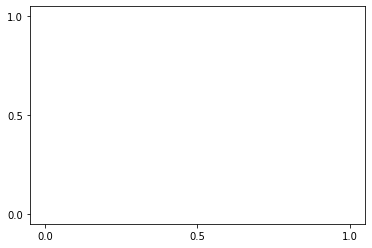

In [1]:
import torch
import seaborn as sns
from src.models import PJPE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2

### Load the results

In [2]:
# Get metrics

resume = "absurd-music-3244"
mj = 0
t_data_bh = torch.load(f"../src/results/t_data_{resume}_bh_True_mj_{mj}.pt")
t_data_zv = torch.load(f"../src/results/t_data_{resume}_bh_False_mj_{mj}.pt")

pjpe_bh = t_data_bh['bh']
pjpe_zv = t_data_zv['zv']
print(list(t_data_zv.keys()))

['recon_2d', 'recon_3d', 'novel_2d', 'target_2d', 'target_3d', 'z', 'action', 'recon_3d_org', 'zv']


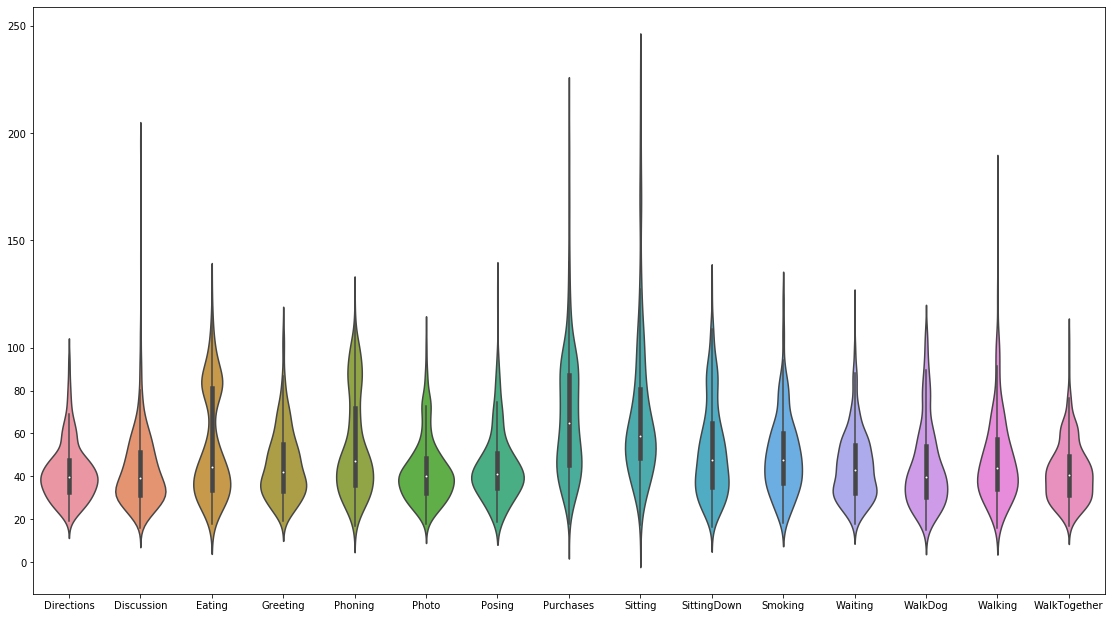

In [4]:
# Get data
pjpes = pjpe_bh.cpu().numpy()
actions = t_data_bh['action'].cpu().numpy()

ax = sns.violinplot(actions, pjpes)

ticks = list(np.arange(100, pjpes.max()+50, 50))
ticks.extend(np.arange(0,100,20))
_ = plt.setp(ax,yticks=sorted(ticks))
_ = ax.set_xticklabels(["Directions", "Discussion", "Eating", "Greeting", "Phoning", "Photo", "Posing", "Purchases",
                             "Sitting", "SittingDown", "Smoking", "Waiting", "WalkDog", "Walking", "WalkTogether"])
_ = plt.savefig("../src/results/violin_pjpe.svg", format='svg', dpi=1200)